# Pymaceuticals Inc.
---

### Analysis

 The observations from the provided data are as follows:

Capomulin appears to be an effective treatment in reducing tumour volume over time when compared to other treatment regimens.

Ramicane has performed equally or slightly better than Capomulin in reducing tumour volume on the last day of the study. However, fewer mice received the Ramicane regimen than Capomulin, which could affect the analysis for Ramicane.

There is a strong correlation between the weight of the mice and the average tumour volume for the Capomulin treatment regimen.

The analysis suggests that Capomulin treatment reduces tumour volume between days 5 to 26, but tumour volume increases again from days 30 to 45. Further analysis will be required to understand this observation..
 

In [539]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [540]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [541]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [542]:
# Combine the data into a single dataset
combined_data = pd.merge( study_results, mouse_metadata, how='left')

In [543]:
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [544]:
# Checking the number of mice.
number_of_mice=len(combined_data["Mouse ID"].value_counts())
number_of_mice

249

In [545]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [546]:
# Optional: Get all the data for the duplicate mouse ID. 

In [547]:
dup_mice_df = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [548]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [549]:
# Checking the number of mice in the clean DataFrame.
unique_number_of_mice=len(clean_df["Mouse ID"].value_counts())
unique_number_of_mice

248

## Summary Statistics

In [550]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



summary_statistics = pd.DataFrame({"Mean Tumor Volume": clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean(), 
                            "Median Tumor Volume": clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median(), 
                           "Tumor Volume Variance": clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var(), 
                           "Tumor Volume Std. Dev.": clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std(), 
                           "Tumor Volume Std. Err.": clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [551]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistic = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistic

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

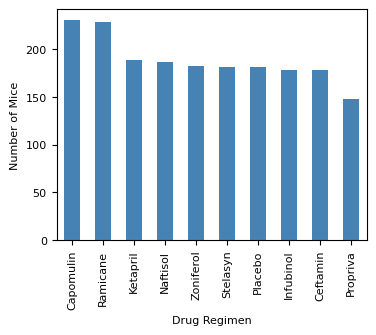

In [552]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

plot_pandas = mice_count.plot.bar(color='steelblue', figsize=(4, 3), fontsize = 8) 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")



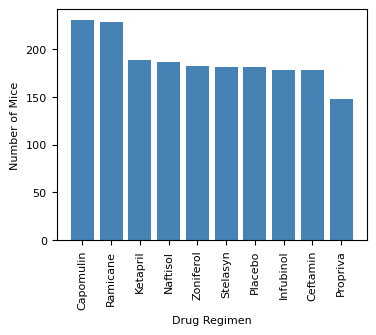

In [553]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
fig = plt.figure(figsize=(4, 3))
plt.bar(x_axis, y_axis, color='steelblue', width=0.8)
# Set the xlabel and ylabel, title using class methods
plt.rcParams['font.size'] = '8'
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")


plt.show()


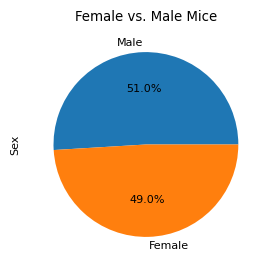

In [554]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
per_gender = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
per_gender.plot.pie(autopct = "%1.1f%%", figsize = (4, 3), fontsize = 8)
plt.show()

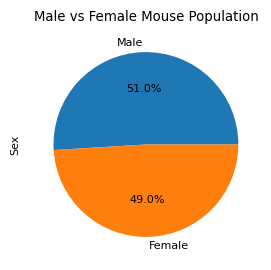

In [555]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = per_gender.plot.pie(y='Total Count', autopct="%1.1f%%", figsize = (4, 3), fontsize = 8)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [556]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = last_timepoint.merge(clean_df, on=["Mouse ID", "Timepoint"], how="left")
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [557]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_total = [ ]

for drug in drug_list:

    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_vol_total.append(tumor_vol)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quantiles=tumor_vol.quantile([0.25,0.5,0.75])
    iqr = quantiles[0.75]-quantiles[0.25]
    lowerbound=quantiles[0.25] - iqr
    upperbound=quantiles[0.75] + iqr

    outlier=tumor_vol.loc[(tumor_vol<lowerbound)|(tumor_vol>upperbound)]
    print(f"{drug}'s potential outliers: {outlier}")

Capomulin's potential outliers: 174    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 96    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


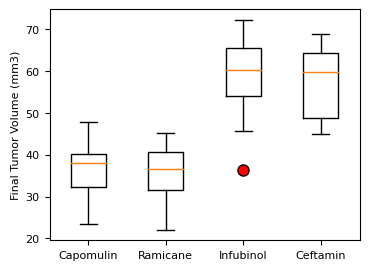

In [558]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(markerfacecolor='r', markersize=8, linestyle='none')
plt.figure(figsize=(4,3))
plt.boxplot(tumor_vol_total, labels = drug_list, flierprops = flierprops)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

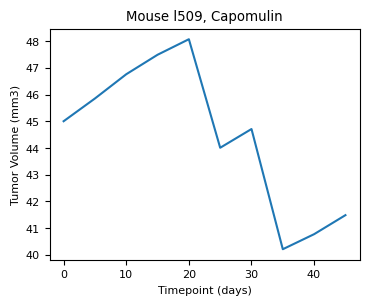

In [497]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
single_mouse_plot = capomulin_mouse.loc[capomulin_mouse["Mouse ID"] == "l509"].plot.line(x="Timepoint",
                                                                                       y="Tumor Volume (mm3)",
                                                                                       legend=False,
                                                                                       title="Mouse l509, Capomulin", figsize = (4, 3))

single_mouse_plot = single_mouse_plot.set(xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)")

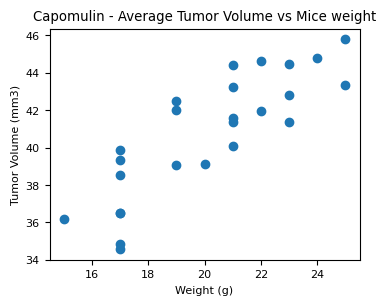

In [559]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen

Capomulin_mouse = capomulin_mouse.groupby(["Mouse ID"])

Capomulin_weight = Capomulin_mouse["Weight (g)"].mean()
Capomulin_avg_tumorvol = Capomulin_mouse["Tumor Volume (mm3)"].mean()

Capomulin_df = pd.DataFrame({
                    "Capo_Weight" : Capomulin_weight,
                    "Capu_Avg_TumVol" : Capomulin_avg_tumorvol
                            })

Capo_Weight_Scat = Capomulin_df["Capo_Weight"]
Capo_Tumor_Scat = Capomulin_df["Capu_Avg_TumVol"]
plt.figure(figsize=(4,3))
plt.title("Capomulin - Average Tumor Volume vs Mice weight")
plt.scatter(Capo_Weight_Scat, Capo_Tumor_Scat)
plt.xlabel("Weight (g)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


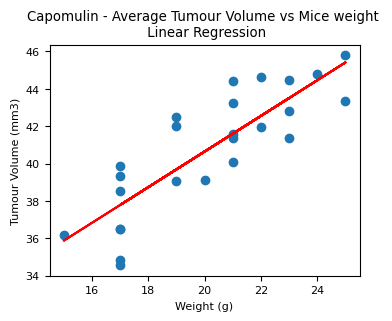

In [476]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(Capo_Weight_Scat, Capo_Tumor_Scat)
regress_values = Capo_Weight_Scat * slope + intercept

correlation = st.pearsonr(Capo_Weight_Scat, Capo_Tumor_Scat)
print(f"The correlation between both factors is {round(correlation[0],2)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(4,3))
plt.title("Capomulin - Average Tumour Volume vs Mice weight \n Linear Regression")
plt.scatter(Capo_Weight_Scat, Capo_Tumor_Scat)
plt.plot(Capo_Weight_Scat,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel('Tumour Volume (mm3)')

plt.show()